<a href="https://colab.research.google.com/github/TChen90/TensorFlow/blob/master/Coursera%20Getting%20started%20with%20TensorFlow2/Week_2_Building_a_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [0]:
# Build the Sequential feedforward neural network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16,activation='relu', name='hidden_layer_1'))
model.add(Dense(16,activation='relu',name='hidden_layer_2'))
model.add(Dense(10,activation='softmax'))

In [0]:
# Print the model summary
# model.weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                12560     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 16)                272       
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [0]:
# Build the Sequential convolutional neural network model
model = Sequential()
model.add(Conv2D(16,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [0]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 
                       tf.keras.metrics.MeanAbsoluteError()])

In [0]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [0]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [0]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [0]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [0]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [0]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

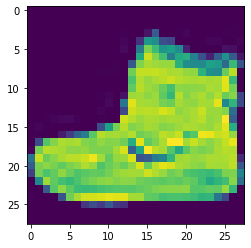

labes: Ankle boot


In [0]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'labes: {labels[train_labels[i]]}')

#### Fit the model

In [0]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.8713 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3388 - sparse_categorical_accuracy: 0.8782 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.8846 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3100 - sparse_categorical_accuracy: 0.8891 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 13s 54ms/step - loss: 0.3017 - sparse_categorical_accuracy: 0.8920 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2934 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2868 - sparse_categoric

#### Plot training history

In [0]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.362301,0.871350,4.420000
1,0.338836,0.878217,4.420001
2,0.324228,0.884650,4.420000
3,0.309989,0.889050,4.420000
4,0.301675,0.891983,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

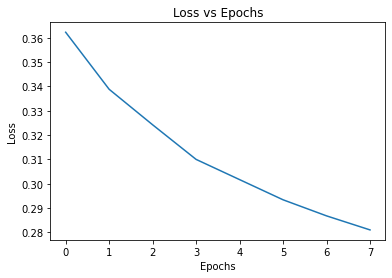

In [0]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

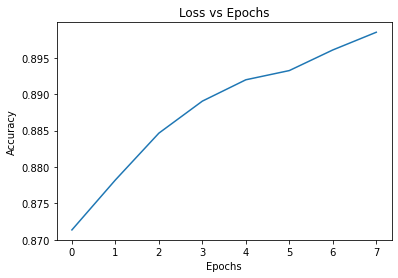

In [0]:
# Make a plot for the accuracy
loss_plot = df.plot(y='sparse_categorical_accuracy', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

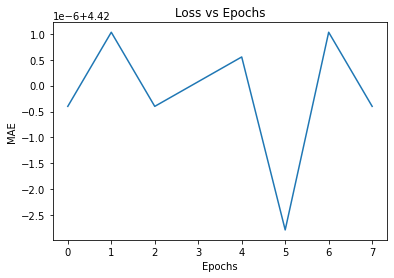

In [0]:
# Make a plot for the additional metric
loss_plot = df.plot(y='mean_absolute_error', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='MAE')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [0]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [0]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.8903 - mean_absolute_error: 4.4200


#### Make predictions from the model

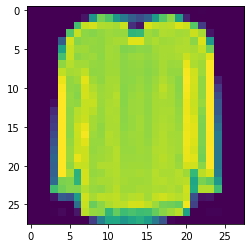

Label: Shirt


In [0]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])
inx = 30
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [0]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f'Model prediction: {labels[np.argmax(predictions)]}')

Model prediction: T-shirt/top
